In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

# load the data

You need to change the file type to txt by appending '.txt' to the '.wl1' files.

In [3]:
path = os.getcwd() + "/2025-01-28-Group1/"
files = os.listdir(path)
print(files)

['.DS_Store', '2025-01-28_006', '2025-01-28_001', '2025-01-28_008', '2025-01-28_009', '2025-01-28_007', '2025-01-28_002', '2025-01-28_005', '2025-01-28_004', '2025-01-28_003']


In [4]:
# try the first file
sub_path = '2025-01-28_001'
data_path = path + sub_path

filename1 = os.path.join(data_path, sub_path + '.wl1.txt')
filename2 = os.path.join(data_path, sub_path + '.wl2.txt')

print(filename1)
print(filename2)

/Users/adamsmith/Desktop/ACADEMICS/YORKU/taships/Tutoring/tutoring/Salman/2025-01-28-Group1/2025-01-28_001/2025-01-28_001.wl1.txt
/Users/adamsmith/Desktop/ACADEMICS/YORKU/taships/Tutoring/tutoring/Salman/2025-01-28-Group1/2025-01-28_001/2025-01-28_001.wl2.txt


In [5]:
# import text file 
data1 = pd.read_csv(filename1, sep=r'\s+', header=None)
data2 = pd.read_csv(filename2, sep=r'\s+', header=None)
# print(data1)
print(data2)

          0         1         2         3         4         5         6   \
0   0.035096  0.010170  0.035766  0.026234  0.017958  0.097040  0.006404   
1   0.035052  0.010129  0.035719  0.026219  0.017912  0.097036  0.006366   
2   0.035234  0.010161  0.035814  0.026412  0.018108  0.097806  0.006383   
3   0.035401  0.010201  0.035951  0.026559  0.018181  0.098367  0.006400   
4   0.034696  0.010089  0.035430  0.025786  0.017623  0.095271  0.006288   
5   0.034560  0.010056  0.035262  0.025762  0.017606  0.095334  0.006287   
6   0.034619  0.010065  0.035255  0.025835  0.017652  0.095759  0.006284   
7   0.034611  0.010040  0.035265  0.025920  0.017727  0.095943  0.006272   
8   0.034872  0.010057  0.035402  0.026163  0.017903  0.096718  0.006299   
9   0.034890  0.010058  0.035440  0.026102  0.017854  0.096694  0.006268   
10  0.034209  0.009974  0.034919  0.025452  0.017412  0.094137  0.006187   
11  0.034136  0.009936  0.034811  0.025433  0.017399  0.094322  0.006170   
12  0.034174

In [6]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
# accessing rows
print(data1.loc[0])

# multiple rows
# print(data.loc[[1,2,4]])

# slicing 
# print(data.loc[0:5])

0     0.018647
1     0.004927
2     0.017979
3     0.014473
4     0.009549
5     0.077201
6     0.002554
7     0.001401
8     0.006188
9     0.044977
10    0.009310
11    0.003225
12    0.009696
13    0.028031
14    0.004740
15    0.035267
16    0.003610
17    0.001931
18    0.011020
19    0.042993
Name: 0, dtype: float64


In [11]:
# accessing columns
print(data1[1].values)

# or 
# print(data.loc[:,0])

# accessing multiple columns
# print(data.loc[:,[0,1]])

# slicing 
# print(data.loc[:,0:5])

[0.00492677 0.00493792 0.00494101 0.00494185 0.00492049 0.00492573
 0.0049224  0.00491901 0.00492126 0.00495954 0.00489176 0.00488432
 0.00487243 0.00489464 0.00488935 0.00489662 0.00486749 0.00486089
 0.00484929 0.00487334 0.00487877 0.00487682 0.00488328 0.00485781
 0.00485714 0.00487732 0.00487149 0.00489241 0.00492446]


In [ ]:
data1.keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [17]:
error = np.zeros(len(data1))
data1['error'] = error

print(data1.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       'error'],
      dtype='object')


# Analyse the data

In [20]:
sampling_freq = 10.2
period = 1/sampling_freq
time = np.ones(len(data1))*period*np.arange(len(data1))
# wavelength1 = 760e-9 # in meters
# wavelength2 = 850e-9 # in meters
DPF = 6.0

# tabulate extinction coefficients from https://omlc.org/spectra/hemoglobin/summary.html
eHB02_760 = 586
eHB_760 = 1548.52

eHB02_850 = 1058
eHB_850 = 691.32

d = 1 #?

# add time to the dataframe 
data1['time'] = time
data2['time'] = time

In [21]:
# new dataframs with time and specific channel 
data1 = data1[[0, 'time']]
data2 = data2[[0, 'time']]

print(data1)

           0      time
0   0.018647  0.000000
1   0.018638  0.098039
2   0.018668  0.196078
3   0.018744  0.294118
4   0.018521  0.392157
5   0.018479  0.490196
6   0.018518  0.588235
7   0.018513  0.686275
8   0.018609  0.784314
9   0.018627  0.882353
10  0.018401  0.980392
11  0.018362  1.078431
12  0.018436  1.176471
13  0.018446  1.274510
14  0.018491  1.372549
15  0.018555  1.470588
16  0.018301  1.568627
17  0.018270  1.666667
18  0.018318  1.764706
19  0.018329  1.862745
20  0.018395  1.960784
21  0.018435  2.058824
22  0.018446  2.156863
23  0.018260  2.254902
24  0.018279  2.352941
25  0.018300  2.450980
26  0.018322  2.549020
27  0.018375  2.647059
28  0.018437  2.745098


In [83]:
A1[5]

np.float64(-0.0006339419125391478)

In [26]:
# set up for system of equations in matrix form 
epsilon_M = np.array([[eHB02_760, eHB_760], [eHB02_850, eHB_850]])
A1 = -np.log10(data1[0]/np.mean(data1[0]))
A2 = -np.log10(data2[0]/np.mean(data2[0]))
A = np.array([A1, A2])

# solve the system of equations 
d = 1
DPF = 6.0

# dlelta_C = A / epsilon_M * d * DPF
epsilon_const = epsilon_M * d * DPF
# invert the epsilon matric 
epsilon_inv = np.linalg.inv(epsilon_const)

# solve for each time point
deltaC = np.dot(epsilon_inv, A)

# # solve for each time point 
# concentrations = []
# for i in range(len(data1)):
#     time = data1['time'][i]
#     A = np.array([A1[i], A2[i]])
#     delta_C = np.dot(epsilon_inv, A)
#     concentrations.append([time, delta_C[0], delta_C[1]])

# concentrations = pd.DataFrame(concentrations, columns=['time', 'HbO2', 'Hb'])

In [29]:
A.shape

(2, 29)

In [94]:
# add delataC to a datafram with time 
concentrations = pd.DataFrame(deltaC.T, columns=['HbO2', 'Hb'])
concentrations['time'] = data1['time']
concentrations

,HbO2,Hb,time
0,-1.661721e-06,1.391572e-07,0.000000
1,-1.566528e-06,1.251480e-07,0.098039
2,-1.969920e-06,2.017230e-07,0.196078
3,-2.236499e-06,1.130956e-07,0.294118
4,-8.947975e-07,1.658315e-07,0.392157
5,-6.292262e-07,1.698845e-07,0.490196
6,-6.997635e-07,9.954716e-08,0.588235
7,-6.874293e-07,1.062904e-07,0.686275
8,-1.160760e-06,4.453247e-08,0.784314
9,-1.168590e-06,2.605352e-09,0.882353


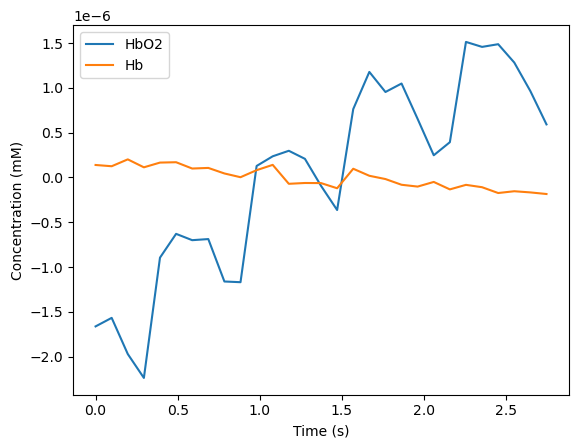

In [95]:
# plot the two concentrations as a function of time 
plt.plot(concentrations['time'], concentrations['HbO2'], label='HbO2')
plt.plot(concentrations['time'], concentrations['Hb'], label='Hb')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mM)')
plt.legend()
plt.show()

In [89]:
concentrations

,time,HbO2,Hb
0,0.000000,-1.661721e-06,1.391572e-07
1,0.098039,-1.566528e-06,1.251480e-07
2,0.196078,-1.969920e-06,2.017230e-07
3,0.294118,-2.236499e-06,1.130956e-07
4,0.392157,-8.947975e-07,1.658315e-07
5,0.490196,-6.292262e-07,1.698845e-07
6,0.588235,-6.997635e-07,9.954716e-08
7,0.686275,-6.874293e-07,1.062904e-07
8,0.784314,-1.160760e-06,4.453247e-08
9,0.882353,-1.168590e-06,2.605352e-09


# Making a function to solve for the conetration of the chromophores

In [23]:
def multiply_array(a, arr, sum=False):
    arr = np.array(arr)
    result = a * arr

    if sum:
        result = np.sum(result)

    return result

In [25]:
arr1 = [1, 2, 3]
multiple = 2

multiply_array(multiple, arr1, sum=True)

np.int64(12)

In [30]:
def chromophore_concentrations(file_num, channel):
    # load in data 
    file_date = f'2025-01-28_00{file_num}' 
    filename1 = path + file_date + '/' + file_date + '.wl1.txt'
    filename2 = path + file_date + '/' + file_date + '.wl2.txt'
    data1 = pd.read_csv(filename1, sep=r'\s+', header=None)
    data2 = pd.read_csv(filename2, sep=r'\s+', header=None)

    # add the time to the data 
    sampling_freq = 10.2
    period = 1/sampling_freq
    time1 = np.ones(len(data1))*period*np.arange(len(data1))
    time2 = np.ones(len(data2))*period*np.arange(len(data2))
    data1['time'] = time1
    data2['time'] = time2

    # get only 1 channel 
    data1 = data1[[channel, 'time']]
    data2 = data2[[channel, 'time']]

    N = len(data1) # number of time points

    # calculate optical density 
    A1 = -np.log10(data1[channel]/np.mean(data1[channel]))
    A2 = -np.log10(data2[channel]/np.mean(data2[channel]))
    A = np.array([A1, A2]) # 2xN matrix

    # extinction coefficients
    eHB02_760, eHB_760 = 586, 1548.52
    eHB02_850, eHB_850 = 1058, 691.32
    # 2x2 matrix of extinction coefficients
    epsilon_M = np.array([[eHB02_760, eHB_760], [eHB02_850, eHB_850]]) # 2x2 array
    
    # constants 
    DPF = 6.0
    d = 1 # dont know what this should be 

    # define E matrix 
    E = epsilon_M * d * DPF

    # Ax = B
    # x = A^-1 * B

    # system of equations 
    # in general deltaC = A / epsilon(lambda) * d * DPF = A / E
    # therefore deltaC = E^-1 * A
    E_inv = np.linalg.inv(E)

    # solve for each time point
    deltaC = np.dot(E_inv, A) # 2xN matrix of concentrations

    # create a dataframe of the concentrations and time 
    concentrations = pd.DataFrame(deltaC.T, columns=['HbO2', 'Hb'])
    concentrations['time'] = data1['time'] # add time to the dataframe

    return concentrations

In [36]:
c_test = chromophore_concentrations(5, 0)

In [37]:
c_test

,HbO2,Hb,time
0,-0.000002,4.181931e-07,0.000000
1,-0.000001,5.837206e-07,0.098039
2,-0.000001,6.219227e-07,0.196078
3,-0.000001,6.497001e-07,0.294118
4,-0.000002,5.491847e-07,0.392157
...,...,...,...
3361,-0.000012,-1.559588e-06,329.509804
3362,-0.000012,-1.585602e-06,329.607843
3363,-0.000013,-1.664704e-06,329.705882
3364,-0.000012,-1.516882e-06,329.803922


In [34]:
def plot_concentrations(concentrations):
    plt.plot(concentrations['time'], concentrations['HbO2'], label='HbO2')
    plt.plot(concentrations['time'], concentrations['Hb'], label='Hb')
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (M)')
    plt.legend()
    plt.show()

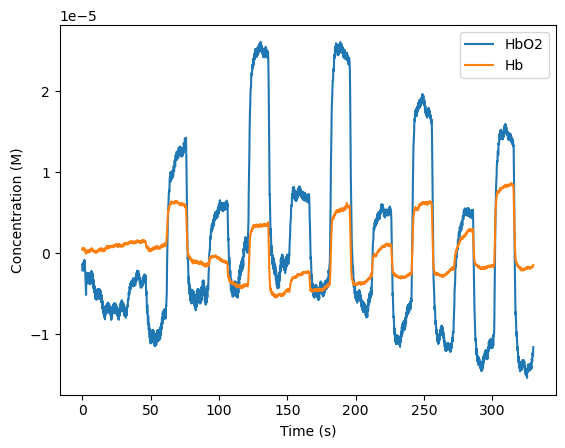

In [38]:
plot_concentrations(c_test)

In [39]:
import scipy.fftpack as fft

In [40]:
c_test.columns

Index(['HbO2', 'Hb', 'time'], dtype='object')

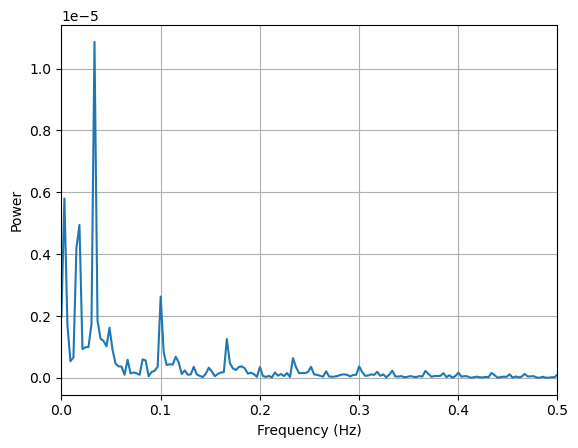

In [42]:
hb02 = c_test['HbO2'].values

N = len(hb02)
T = 1.0 / 10.2

yf = fft.fft(hb02)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# plot the power spectrum
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim(0, 0.5)    
plt.show()

In [46]:
for i in range(5):
    chromophore = chromophore_concentrations(5, i)
    plt.plot(chromophore['time'], chromophore['HbO2'], label='HbO2')
    plt.plot(chromophore['time'], chromophore['Hb'], label='Hb')
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (M)')
    plt.legend()
    plt.savefig(path+'/plots/' + f'group_{5}_channel_{i}.png')
    plt.close()

In [58]:
arr = np.array([[2,3,0],[3,4,1],[4,5,2]])
arr

array([[2, 3, 0],
       [3, 4, 1],
       [4, 5, 2]])

In [57]:
# get the first column 
df = pd.DataFrame(arr, columns=['a','b','time'])
df


,a,b,time
0,2,3,0
1,3,4,1
2,4,5,2


In [61]:
df['a'].values

array([2, 3, 4])

In [67]:
df['freq'] = 1/ (df['time'] + 0.0001)

In [68]:
df

,a,b,time,freq
0,2,3,0,10000.000000
1,3,4,1,0.999900
2,4,5,2,0.499975


In [69]:
df.describe()

,a,b,time,freq
count,3.0,3.0,3.0,3.000000
mean,3.0,4.0,1.0,3333.833292
std,1.0,1.0,1.0,5773.069721
min,2.0,3.0,0.0,0.499975
25%,2.5,3.5,0.5,0.749938
50%,3.0,4.0,1.0,0.999900
75%,3.5,4.5,1.5,5000.499950
max,4.0,5.0,2.0,10000.000000


In [70]:
d = {'a':[2,3,0], 'b':[3,4,1], 'time':[4,5,2]}

In [77]:
df = pd.DataFrame(d)
df

,a,b,time
0,2,3,4
1,3,4,5
2,0,1,2
